In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('/content/Dataset/weatherHistory.csv')
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Formatted Date'] = data['Formatted Date'].dt.date
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['dayofyear'] = data['Formatted Date'].dt.dayofyear
data['year'] = data['Formatted Date'].dt.year
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,dayofyear,year
0,2006-03-31 00:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,2006
1,2006-03-31 00:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,2006
3,2006-04-01 00:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,2006
4,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,253,2016
96449,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,253,2016
96450,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,253,2016
96451,2016-09-09 00:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,253,2016


In [19]:
tempreture = data.groupby(['dayofyear','year'])['Temperature (C)'].mean().reset_index()
tempreture

,dayofyear,year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


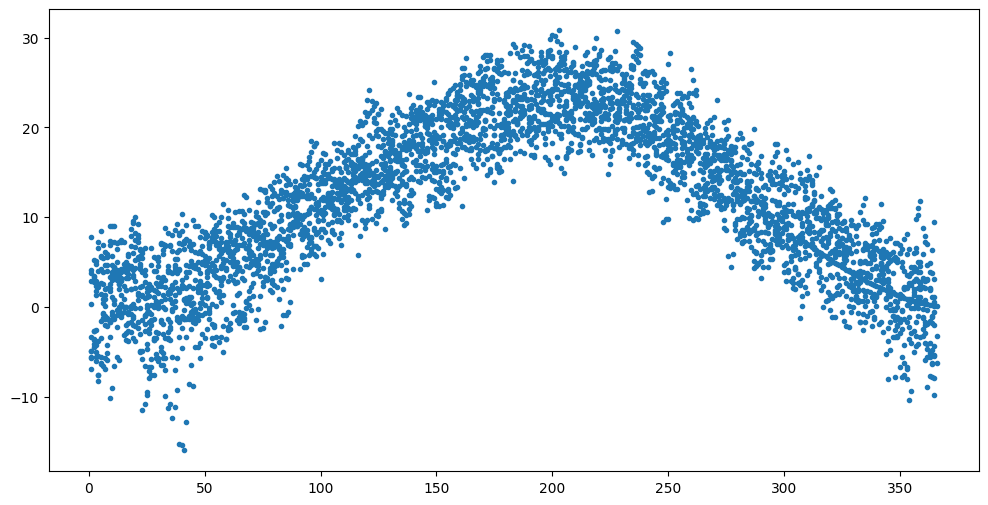

In [20]:
plt.figure(figsize=(12,6))
plt.scatter(tempreture['dayofyear'],tempreture['Temperature (C)'],marker='.')
plt.show()

In [48]:
X = tempreture['dayofyear'].values
Y = tempreture['Temperature (C)'].values



In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2 ,random_state=32)


In [54]:
model = tf.keras.models.Sequential([
    Dense(128,input_dim=1,activation="relu"),
    Dense(64,activation='elu'),
    Dense(32,activation="elu"),
    Dense(1,activation='linear')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss = 'mae')

In [55]:
output = model.fit(X_train,Y_train,epochs=1000)


Epoch 1/1000
101/101 [==============================] - 1s 2ms/step - loss: 7.7733
Epoch 2/1000
101/101 [==============================] - 0s 2ms/step - loss: 6.6791
Epoch 3/1000
101/101 [==============================] - 0s 2ms/step - loss: 5.7722
Epoch 4/1000
101/101 [==============================] - 0s 2ms/step - loss: 4.9817
Epoch 5/1000
101/101 [==============================] - 0s 2ms/step - loss: 4.2524
Epoch 6/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.7861
Epoch 7/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.5715
Epoch 8/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.4509
Epoch 9/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.3751
Epoch 10/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.3179
Epoch 11/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.2877
Epoch 12/1000
101/101 [==============================] - 0s 2ms/step - loss: 3.2707
E

In [56]:
evaluate_test = model.evaluate(X_test,Y_test)
evaluate_test

26/26 [==============================] - 0s 1ms/step - loss: 3.0285


3.02848482131958

In [57]:
Y_pred = model.predict(X)
X.shape

126/126 [==============================] - 0s 1ms/step


(4019,)

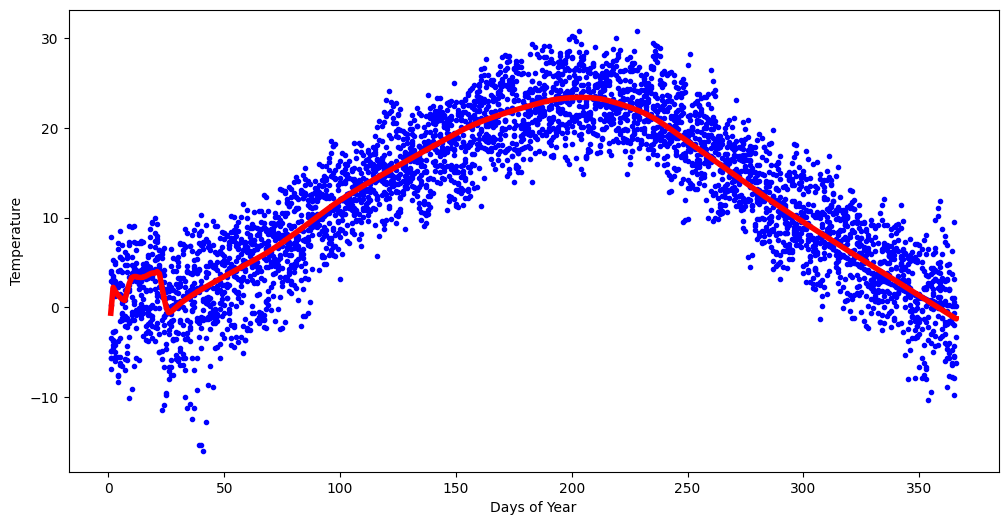

In [60]:
plt.figure(figsize=(12,6))
plt.scatter(tempreture['dayofyear'],tempreture['Temperature (C)'],marker='.',color='blue')
plt.plot(X,Y_pred,c='red',lw=4)
plt.xlabel('Days of Year')
plt.ylabel('Temperature')
plt.show()